# The Sparks Foundation - Internship

#### Data Science and Business Analytics - Kumar Shivam

Task 1: Predicting the Percentage of an student based on number of hours studied and also to predict the score of student who studied for 9.25 Hours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student = pd.read_csv(url)  
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
student.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


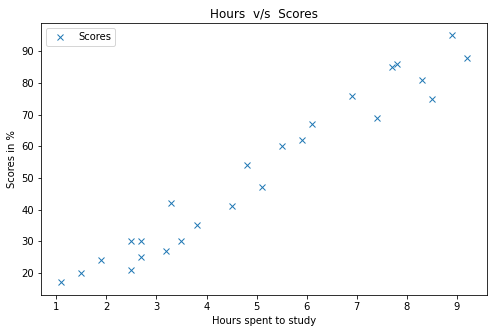

In [30]:
# Plotting the data in a graph format
student.plot(x='Hours', y='Scores', style='x', figsize=(8,5))
mpl.title('Hours  v/s  Scores')
mpl.xlabel('Hours spent to study')
mpl.ylabel('Scores in %')
mpl.show()

In [5]:
# train_test_split method splits the data randomly into test and train sets
train_set, test_set = train_test_split(student, test_size=0.1, random_state=42)

In [9]:
print('Train data: ',len(train_set))
print('Test data: ',len(test_set))

Train data:  22
Test data:  3


In [10]:
# Seperating the inputs and outputs
student_x = train_set.drop("Scores", axis=1)
student_y = train_set["Scores"].copy()

In [11]:
# Using Linear Regression from sklearn to fit our data
lg = LinearRegression()           # Creating a Logistic Regression variable
lg.fit(student_x, student_y)

LinearRegression()

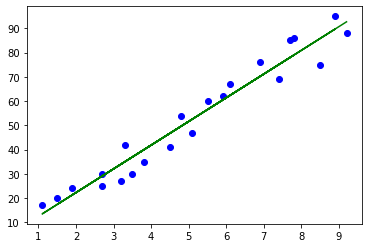

In [26]:
# Plot
mpl.scatter(student_x,student_y, color='b')
mpl.plot(student_x, lg.coef_*student_x + lg.intercept_, color='g')
mpl.show()

Using Test Set

In [13]:
# Seperating the input and output from testset
test_x = test_set.drop("Scores", axis=1)  
test_y = test_set["Scores"].copy()

In [16]:
pd.DataFrame({'Actual Values':test_y, 'Predicted Values':lg.predict(test_x)})

,Actual Values,Predicted Values
8,81,83.897278
16,30,27.150923
0,21,27.150923


Predicting score for 9.25 hours of study

In [18]:
predict_value = np.array([9.25])   # Converting the input into numpy array
studied = predict_value.reshape(-1,1)  

In [19]:
print('If a student studied for 9.25 hours/day then the score is: ',lg.predict(studied)[0])

If a student studied for 9.25 hours/day then the score is:  93.19193983315074


In [20]:
from sklearn.metrics import mean_absolute_error

In [22]:
print('Mean Absolute Error for our trained model is: ',mean_absolute_error(test_y, lg.predict(test_x)))

Mean Absolute Error for our trained model is:  3.9657593887812133
